In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

data_path = '/home/aerodactyl/codes/hospitality_panel/data/Data Panel.xlsx'

df = pd.read_excel(data_path, header=0)

df

Municipality  Year  49.320 taxi companies  51.101 airline   \
0     0114 Upplands-Väsby  2010                    243                0   
1         0115 Vallentuna  2010                     74                0   
2          0117 Österåker  2010                    101                0   
3             0120 Värmdö  2010                    136                0   
4           0123 Järfälla  2010                    252                0   
...                   ...   ...                    ...              ...   
3499           2581 Piteå  2021                     72                0   
3500           2582 Boden  2021                     75                0   
3501       2583 Haparanda  2021                     13                0   
3502          2584 Kiruna  2021                     26                0   
3503          9998 övriga  2021                      0                0   

      51.102 charter and taxi airlines  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   
...                                ...   
3499                                32   
3500                                 0   
3501                                 0   
3502                                 0   
3503                                 0   

      52.219 service companies for land transport  \
0                                               7   
1                                               0   
2                                              11   
3                                              21   
4                                               5   
...                                           ...   
3499                                            0   
3500                                            0   
3501                                            0   
3502                                            7   
3503                                            0   

      55.101 Hotels with restaurants   55.102 konference facilities  \
0                                 125                             0   
1                                   0                             0   
2                                  43                            44   
3                                 160                           110   
4                                  41                             0   
...                               ...                           ...   
3499                              124                            15   
3500                               65                             0   
3501                               49                             0   
3502                              184                            16   
3503                                0                             0   

      55.103 hotels without restaurants  55.201 Hotels etc.  \
0                                     0                   0   
1                                     0                   0   
2                                     0                   0   
3                                     3                   3   
4                                     0                   0   
...                                 ...                 ...   
3499                                  3                   0   
3500                                 13                   4   
3501                                  0                   0   
3502                                 35                   4   
3503                                  0                   0   

      55.202 cottage villages etc.  55.300 campsites etc.  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
3                                0                      0   
4                                0                     

In [ ]:
df.columns

Index(['Municipality', 'Year', '49.320 taxi companies', '51.101 airline ',
       '51.102 charter and taxi airlines',
       '52.219 service companies for land transport',
       '55.101 Hotels with restaurants ', '55.102 konference facilities',
       '55.103 hotels without restaurants', '55.201 Hotels etc.',
       '55.202 cottage villages etc.', '55.300 campsites etc.',
       '55.900 other accomodations', '56.100 restaurants',
       '56.210 catering companies for individual events',
       '56.291 staff canteens', '56.292 central kitchen for hospitals',
       '56.293 central kitchens for school, care and other insitutions',
       '56.294 catering companies for transport sector ',
       '56.299 other catering companies', '56.300 bars and pubs',
       '77.110 car rental companies',
       '77.210 lessors of leisure and sports equipment',
       '77.220 videocassette and DVD rental companies',
       '79.110 travel agencies', '79.120 tour operators',
       '79.900 tourist agenci

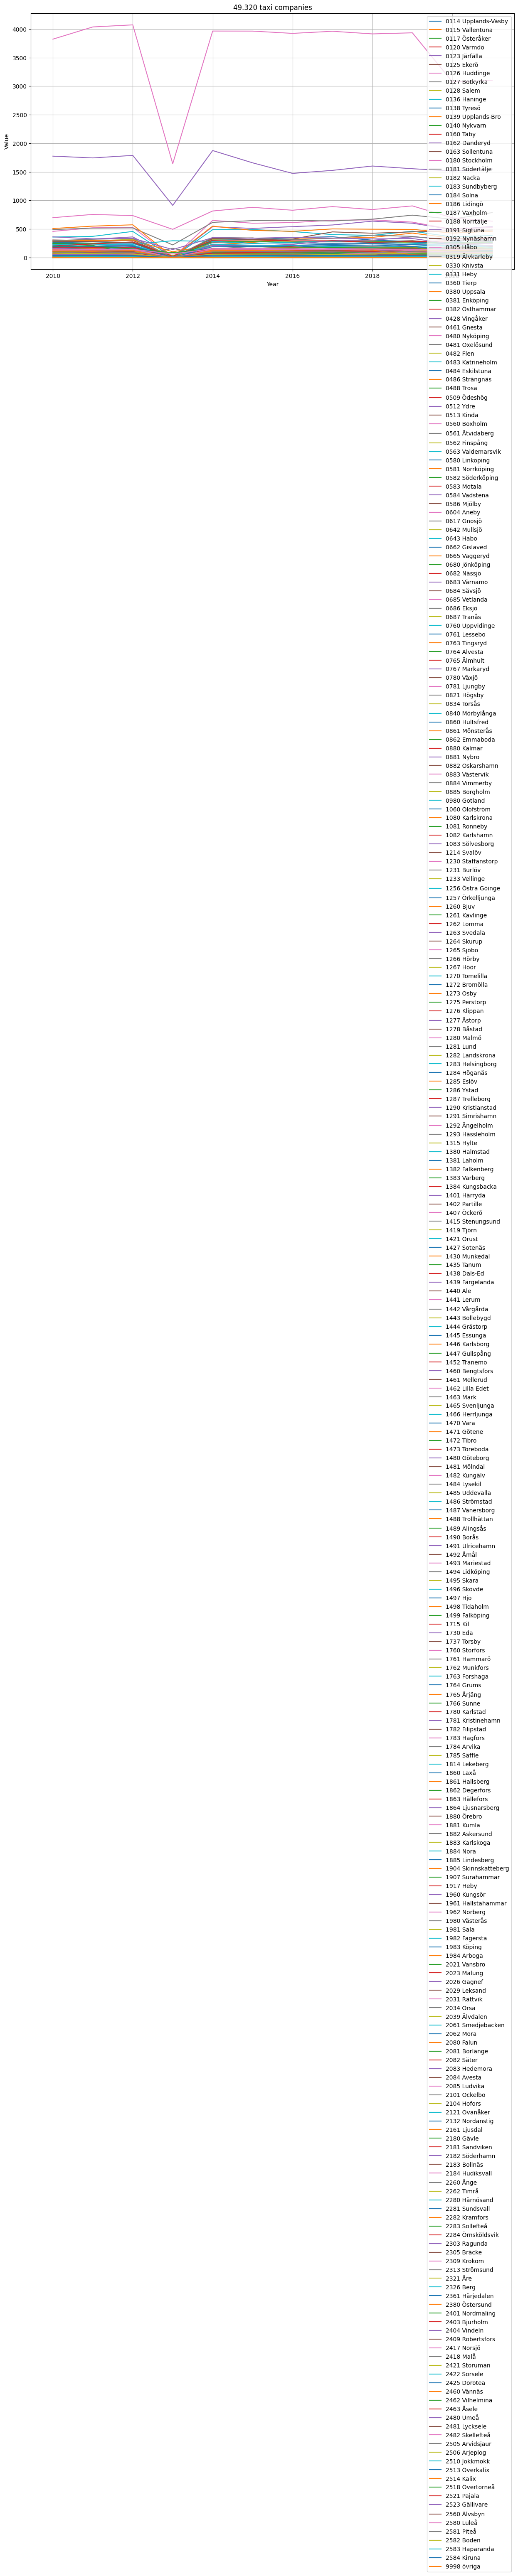

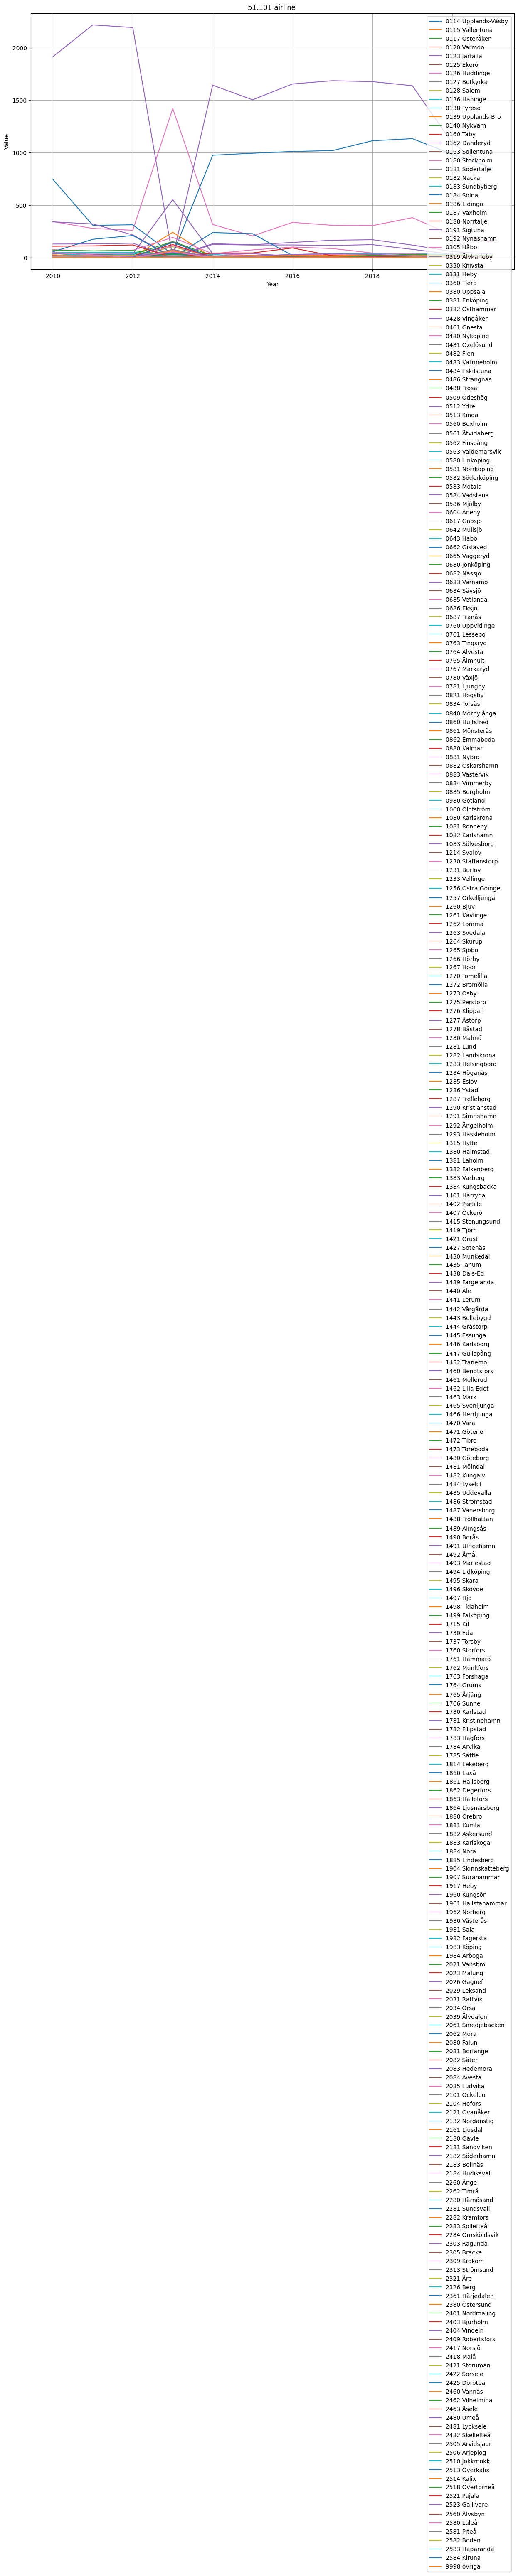

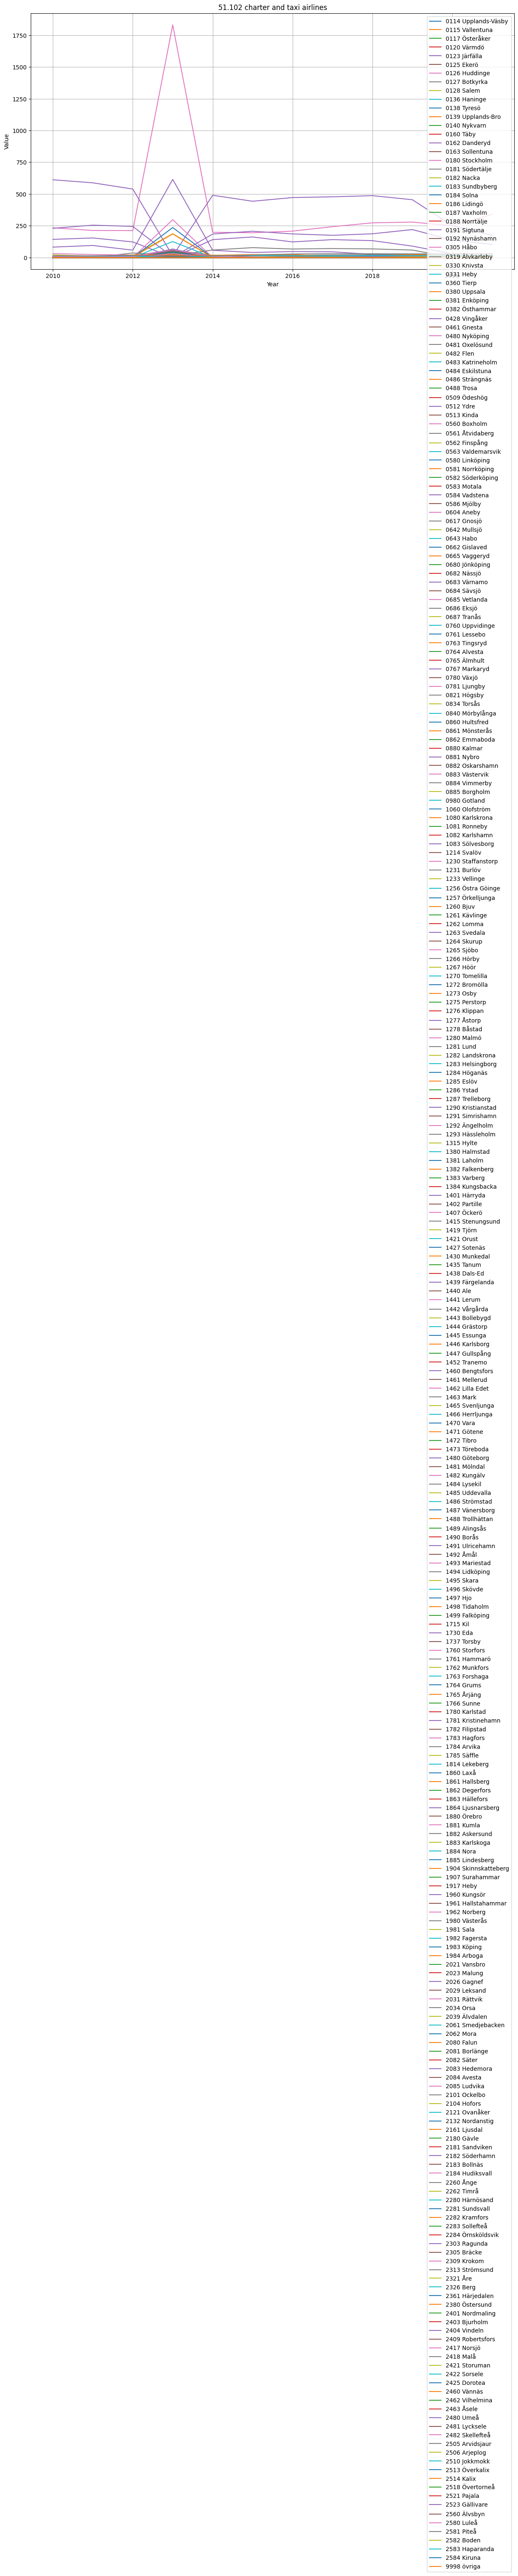

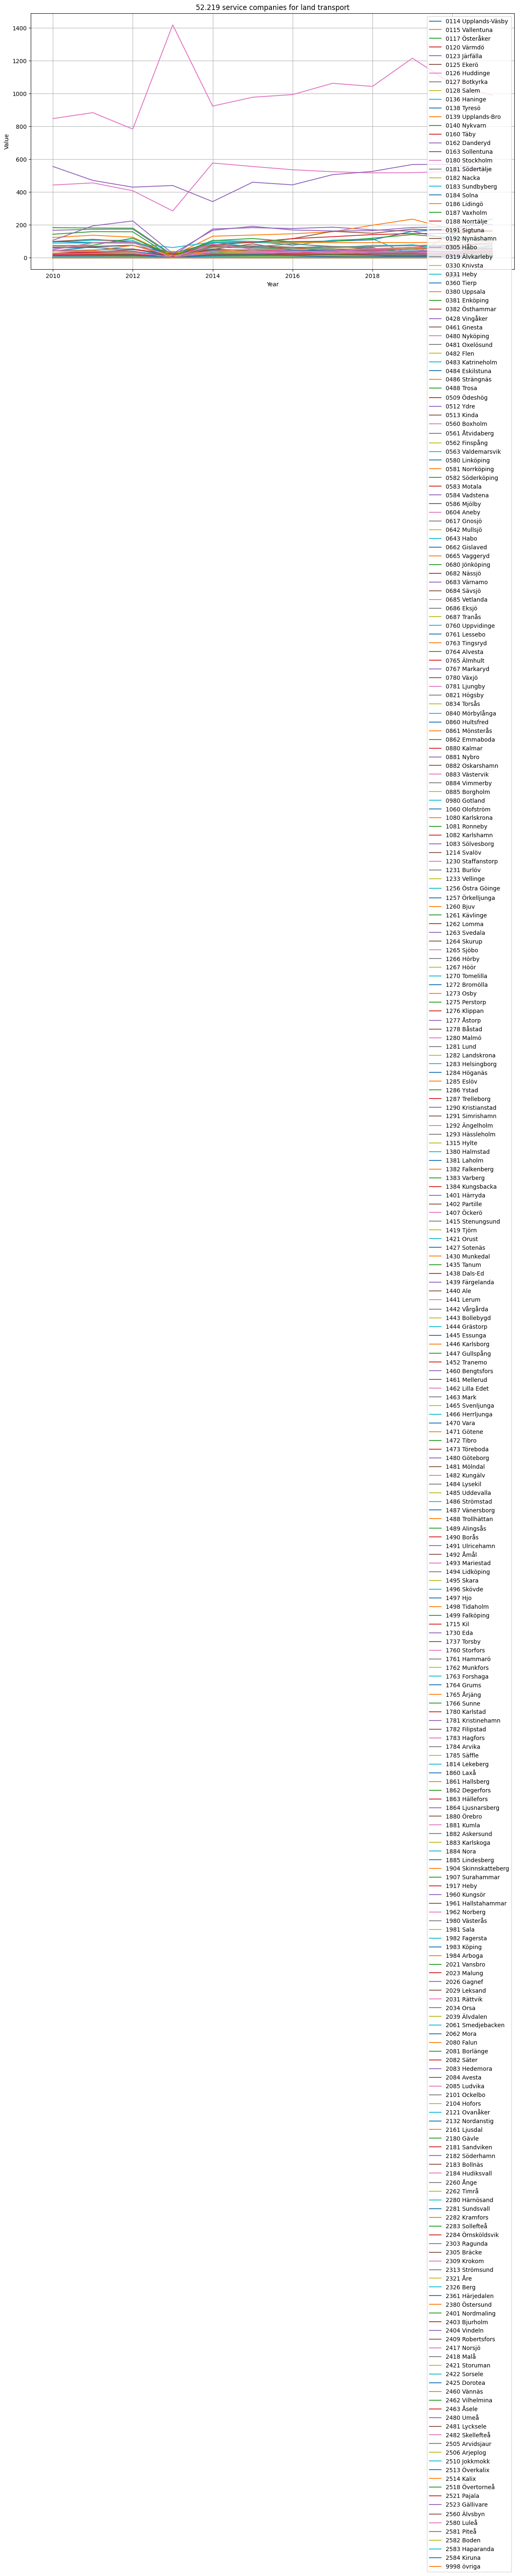

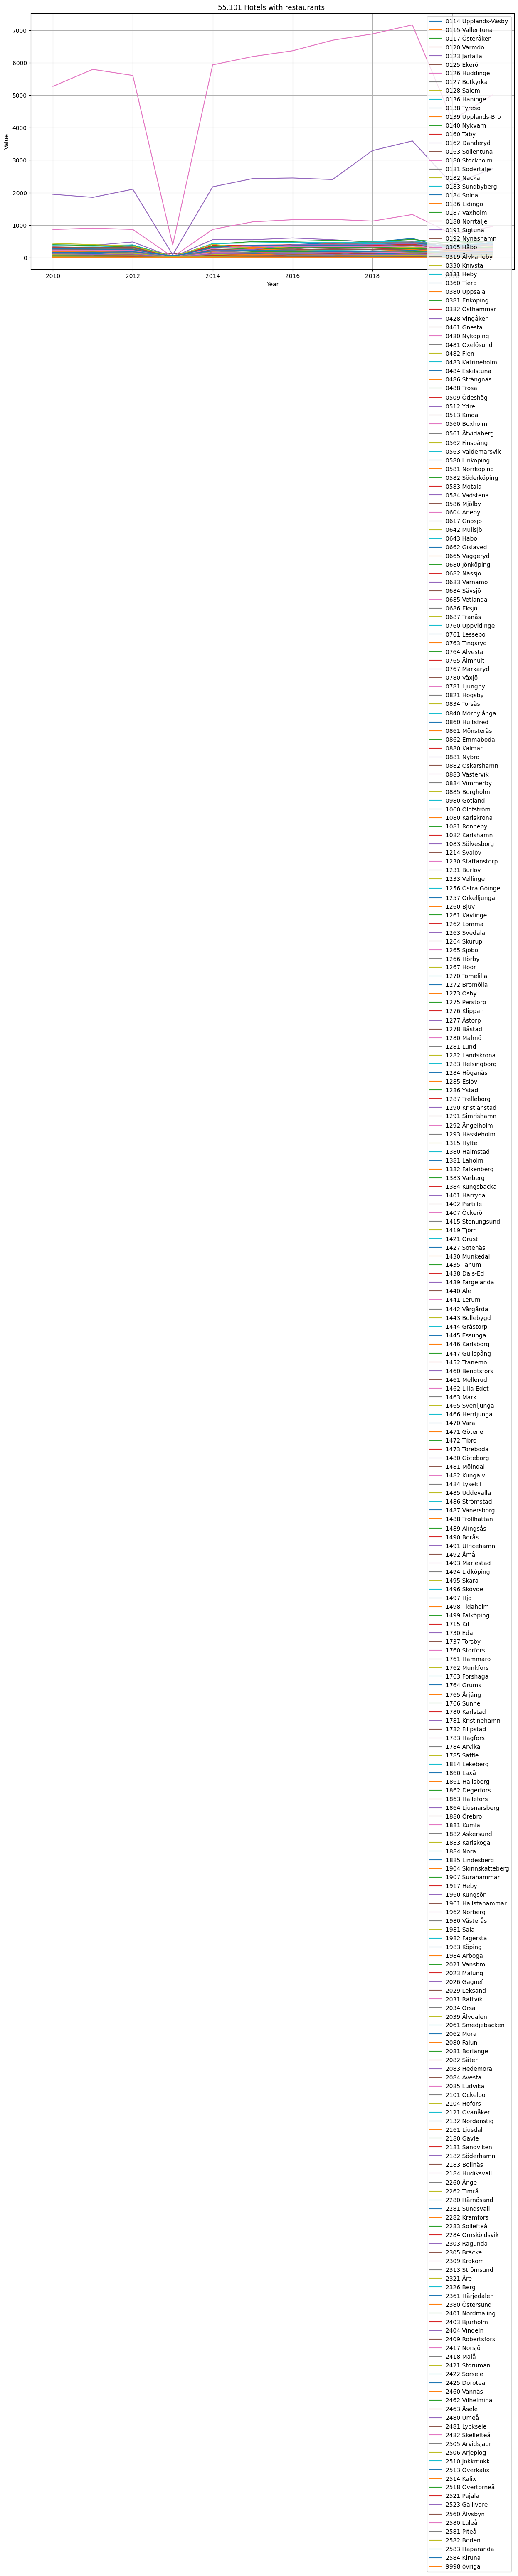

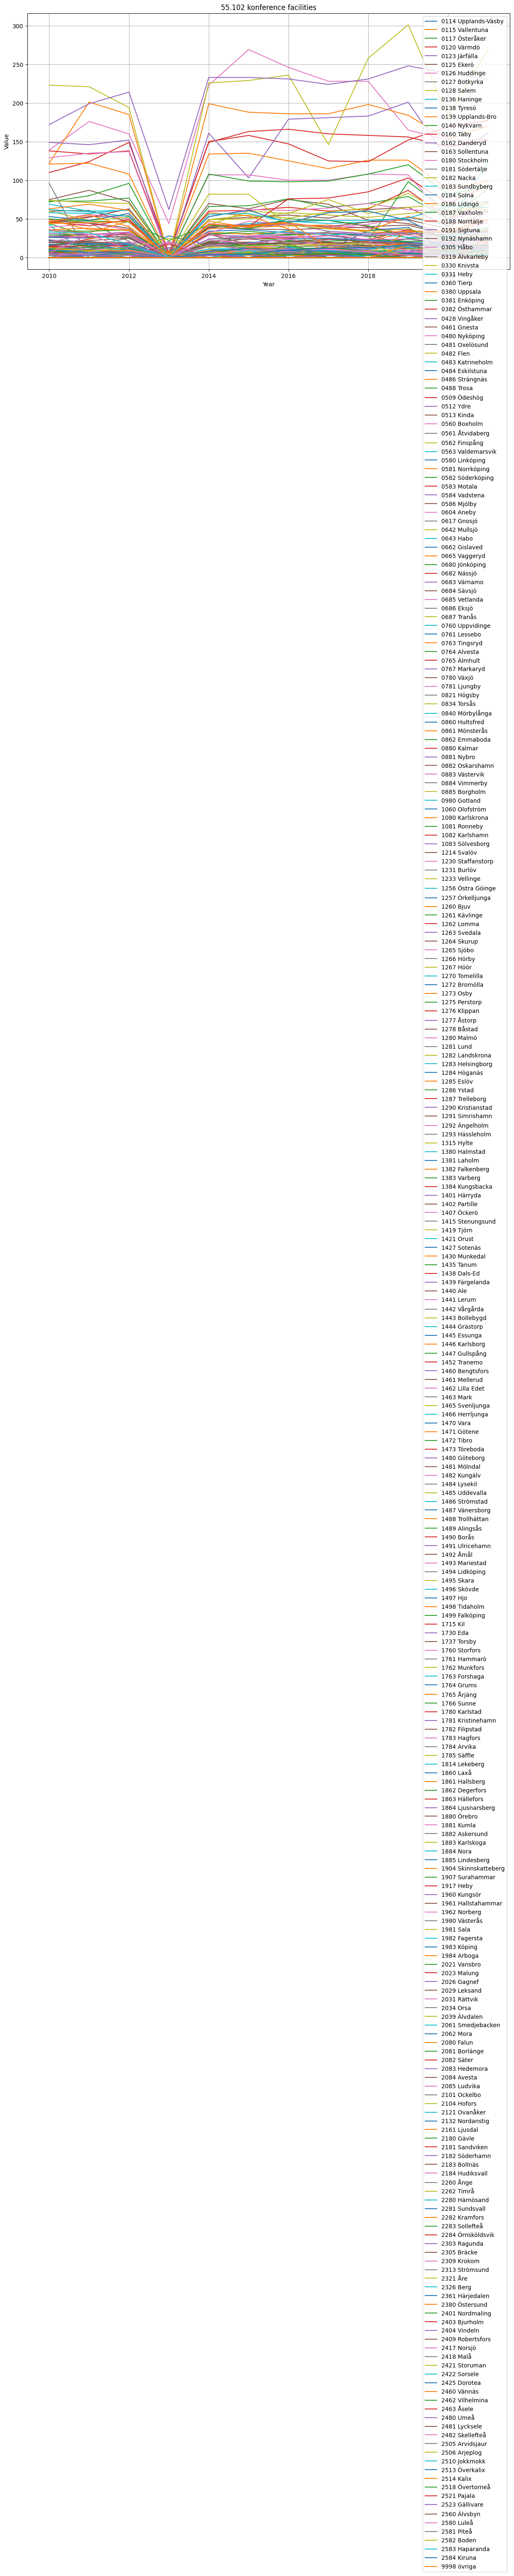

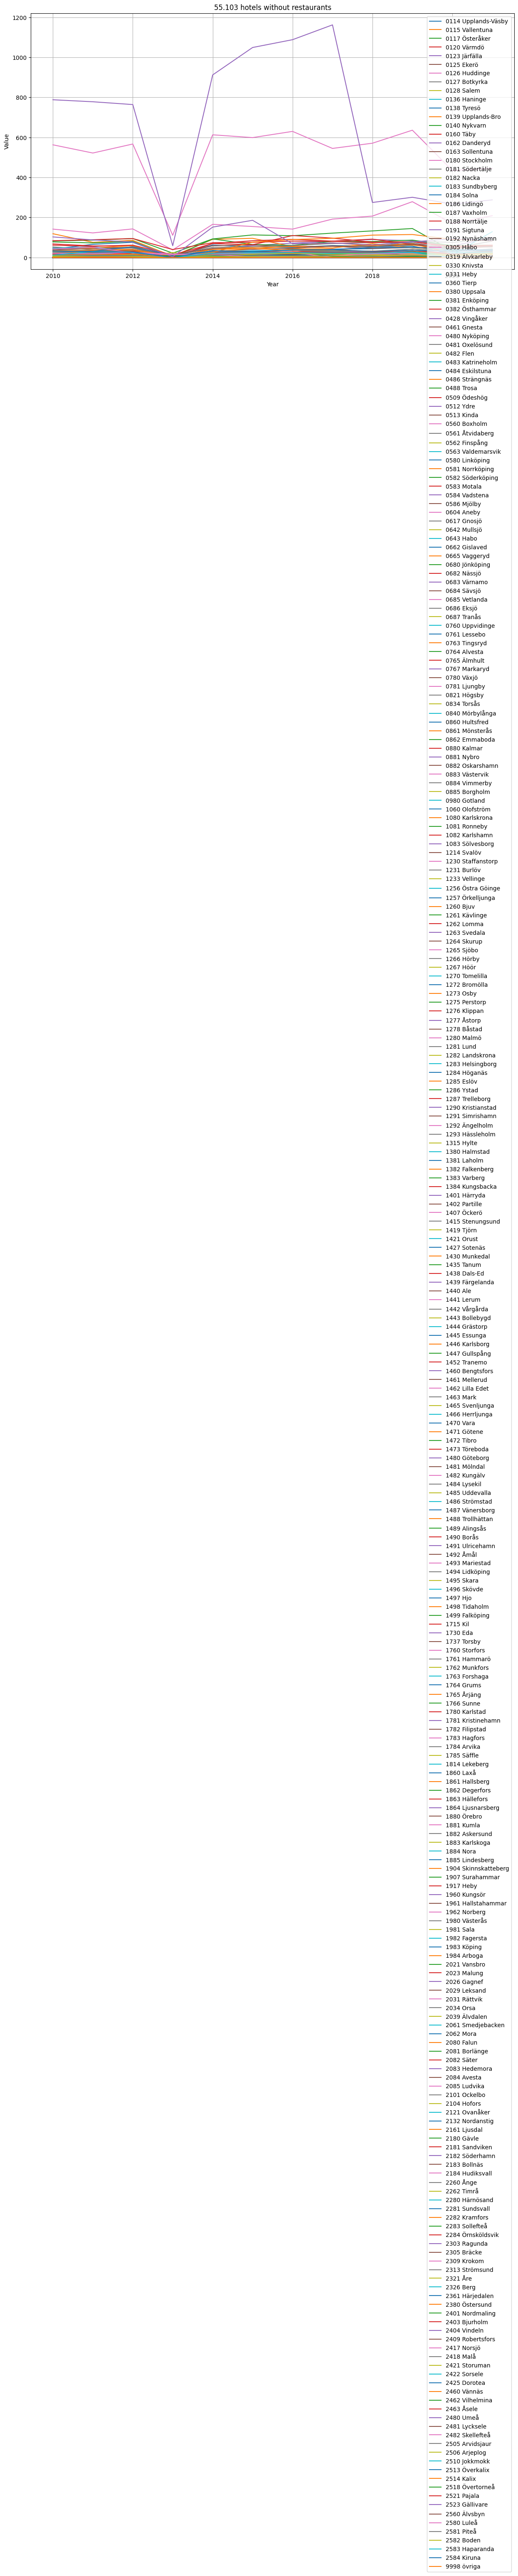

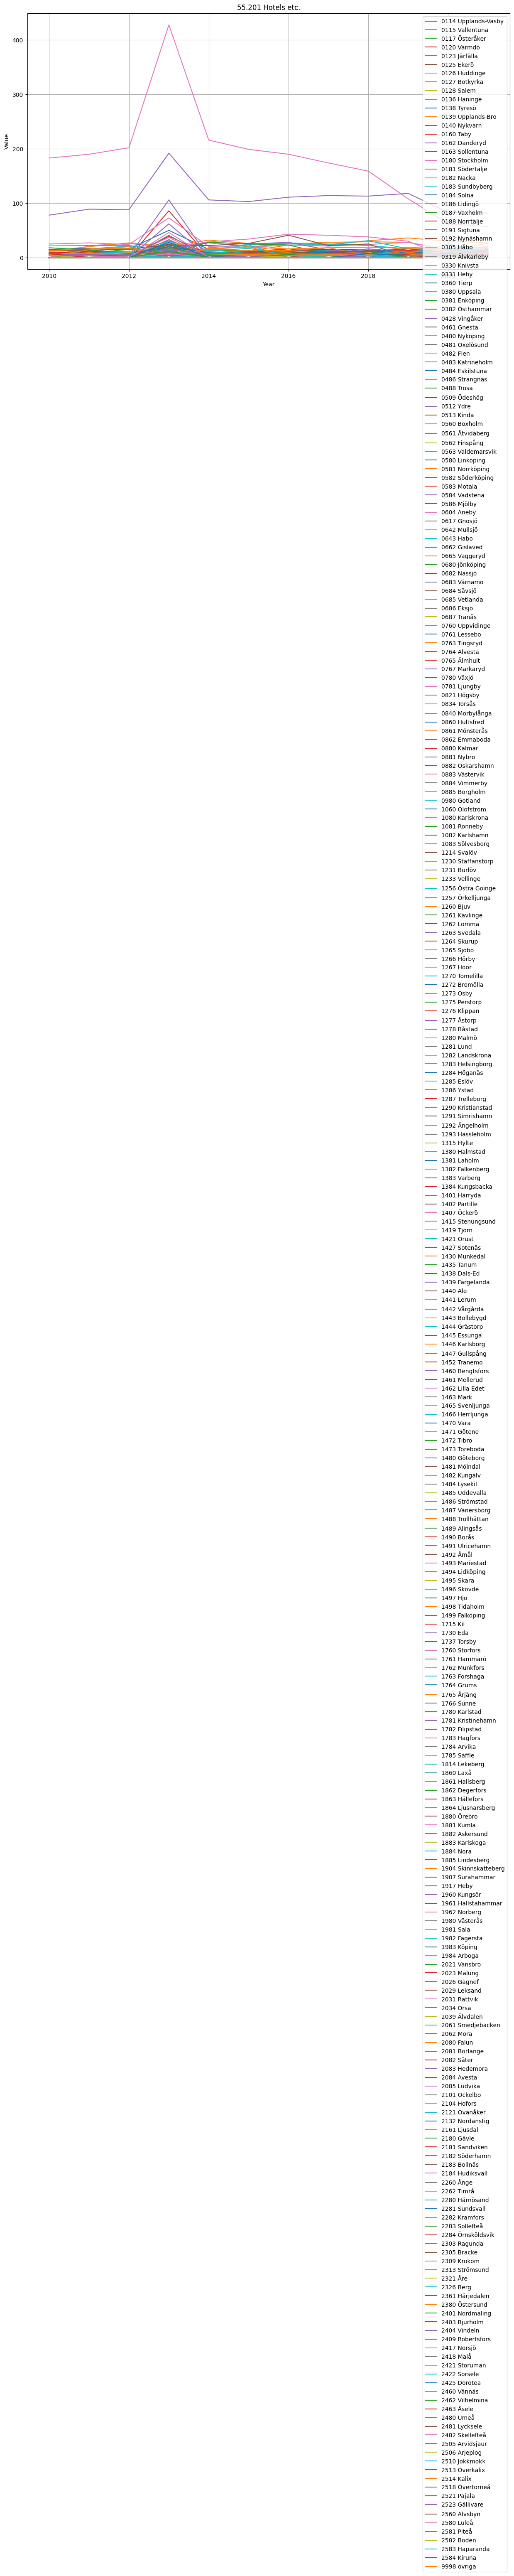

KeyboardInterrupt: 

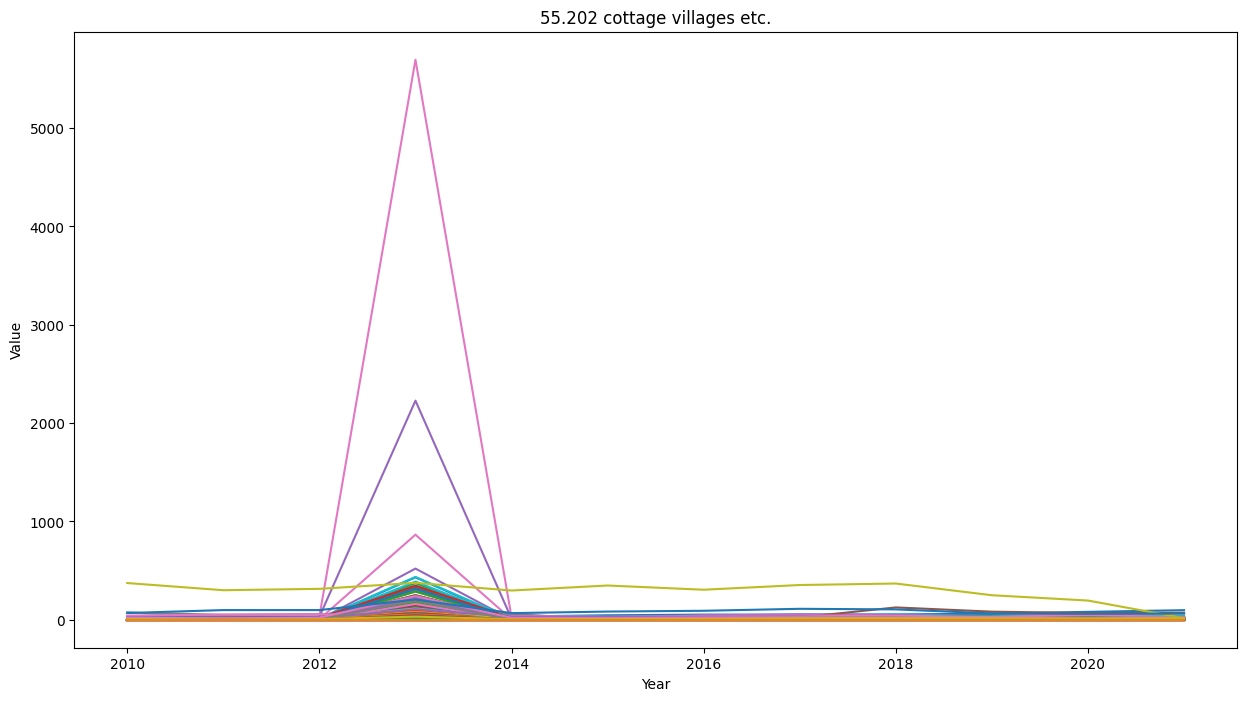

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

grouped_by_province = df.groupby("Municipality")

columns_to_plot = ['49.320 taxi companies', '51.101 airline ',
       '51.102 charter and taxi airlines',
       '52.219 service companies for land transport',
       '55.101 Hotels with restaurants ', '55.102 konference facilities',
       '55.103 hotels without restaurants', '55.201 Hotels etc.',
       '55.202 cottage villages etc.', '55.300 campsites etc.',
       '55.900 other accomodations', '56.100 restaurants',
       '56.210 catering companies for individual events',
       '56.291 staff canteens', '56.292 central kitchen for hospitals',
       '56.293 central kitchens for school, care and other insitutions',
       '56.294 catering companies for transport sector ',
       '56.299 other catering companies', '56.300 bars and pubs',
       '77.110 car rental companies',
       '77.210 lessors of leisure and sports equipment',
       '77.220 videocassette and DVD rental companies',
       '79.110 travel agencies', '79.120 tour operators',
       '79.900 tourist agencies',
       '90.020 support companies for artistic companies',
       '90.040 theater and concert hall companies',
       '91.040 botancal gardens, ZOOS and nature reserves',
       '93.111 Skiing resorts', '93.112 golf courses, golf clubs',
       '93.113 Motorways', '93.114 trotting and galloping tracks',
       '93.119 sports halls, sports fields and other sports facilities',
       '93.120 sports clubs and sports associations', '93.130 gym facilities',
       '93.191 competition stalls',
       '93.199 professional athletes, sport organizers, sport administrators',
       '93.210 amusement and theme parks',
       '93.290 other leisure and entertainment facilities',
       'Total hospitality employment', 'Total employment ']

for column in columns_to_plot:
    plt.figure(figsize=(15, 8))
    for province, data in grouped_by_province:
        plt.plot(data["Year"], data[column], label=province)
    plt.title(column)
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

df.head()

X = df.drop(columns=['Total hospitality employment', 'Total employment '])
y = df['Total hospitality employment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['Municipality'])
    ],
    remainder='passthrough'
)

X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

rf_model2 = RandomForestRegressor(random_state=42)
rf_model2.fit(X_train_encoded, y_train)

y_pred = rf_model2.predict(X_test_encoded)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Random Forest RMSE:", rmse)

predictions_df = pd.DataFrame({
    'Municipality': X_test['Municipality'],
    'Year': X_test['Year'],
    'Actual hospitality employment': y_test,
    'Predicted hospitality employment': y_pred
})

predictions_df

Random Forest RMSE: 102.13158836491326


Municipality  Year  Actual hospitality employment  \
3151       2080 Falun  2020                           1245   
315    0188 Norrtälje  2011                           1139   
2178     1401 Härryda  2017                           1040   
2772  1439 Färgelanda  2019                             64   
430        1419 Tjörn  2011                            213   
...               ...   ...                            ...   
227         2034 Orsa  2010                            185   
555     2403 Bjurholm  2011                             11   
3097   1494 Lidköping  2020                            873   
2655  0319 Älvkarleby  2019                             95   
2379     0509 Ödeshög  2018                            141   

      Predicted hospitality employment  
3151                           1255.10  
315                            1180.63  
2178                           1001.12  
2772                             64.61  
430                             204.79  
...                                ...  
227                             113.86  
555                              10.86  
3097                            882.99  
2655                             93.92  
2379                            144.00  

[701 rows x 4 columns]

In [ ]:
X_all_encoded = column_transformer.transform(X)


all_rf_y = rf_model2.predict(X_all_encoded)

all_rf_pred_df = pd.DataFrame({
    'Municipality': X['Municipality'],
    'Year': X['Year'],
    'Actual hospitality employment': y,
    'Predicted hospitality employment': all_rf_y
})

all_rf_pred_df

Municipality  Year  Actual hospitality employment  \
0     0114 Upplands-Väsby  2010                           1005   
1         0115 Vallentuna  2010                            356   
2          0117 Österåker  2010                            660   
3             0120 Värmdö  2010                            955   
4           0123 Järfälla  2010                            960   
...                   ...   ...                            ...   
3499           2581 Piteå  2021                            854   
3500           2582 Boden  2021                            605   
3501       2583 Haparanda  2021                            150   
3502          2584 Kiruna  2021                            766   
3503          9998 övriga  2021                              0   

      Predicted hospitality employment  
0                               932.39  
1                               355.37  
2                               629.25  
3                               908.81  
4                              1020.75  
...                                ...  
3499                            876.73  
3500                            592.00  
3501                            170.05  
3502                            729.76  
3503                              0.00  

[3504 rows x 4 columns]

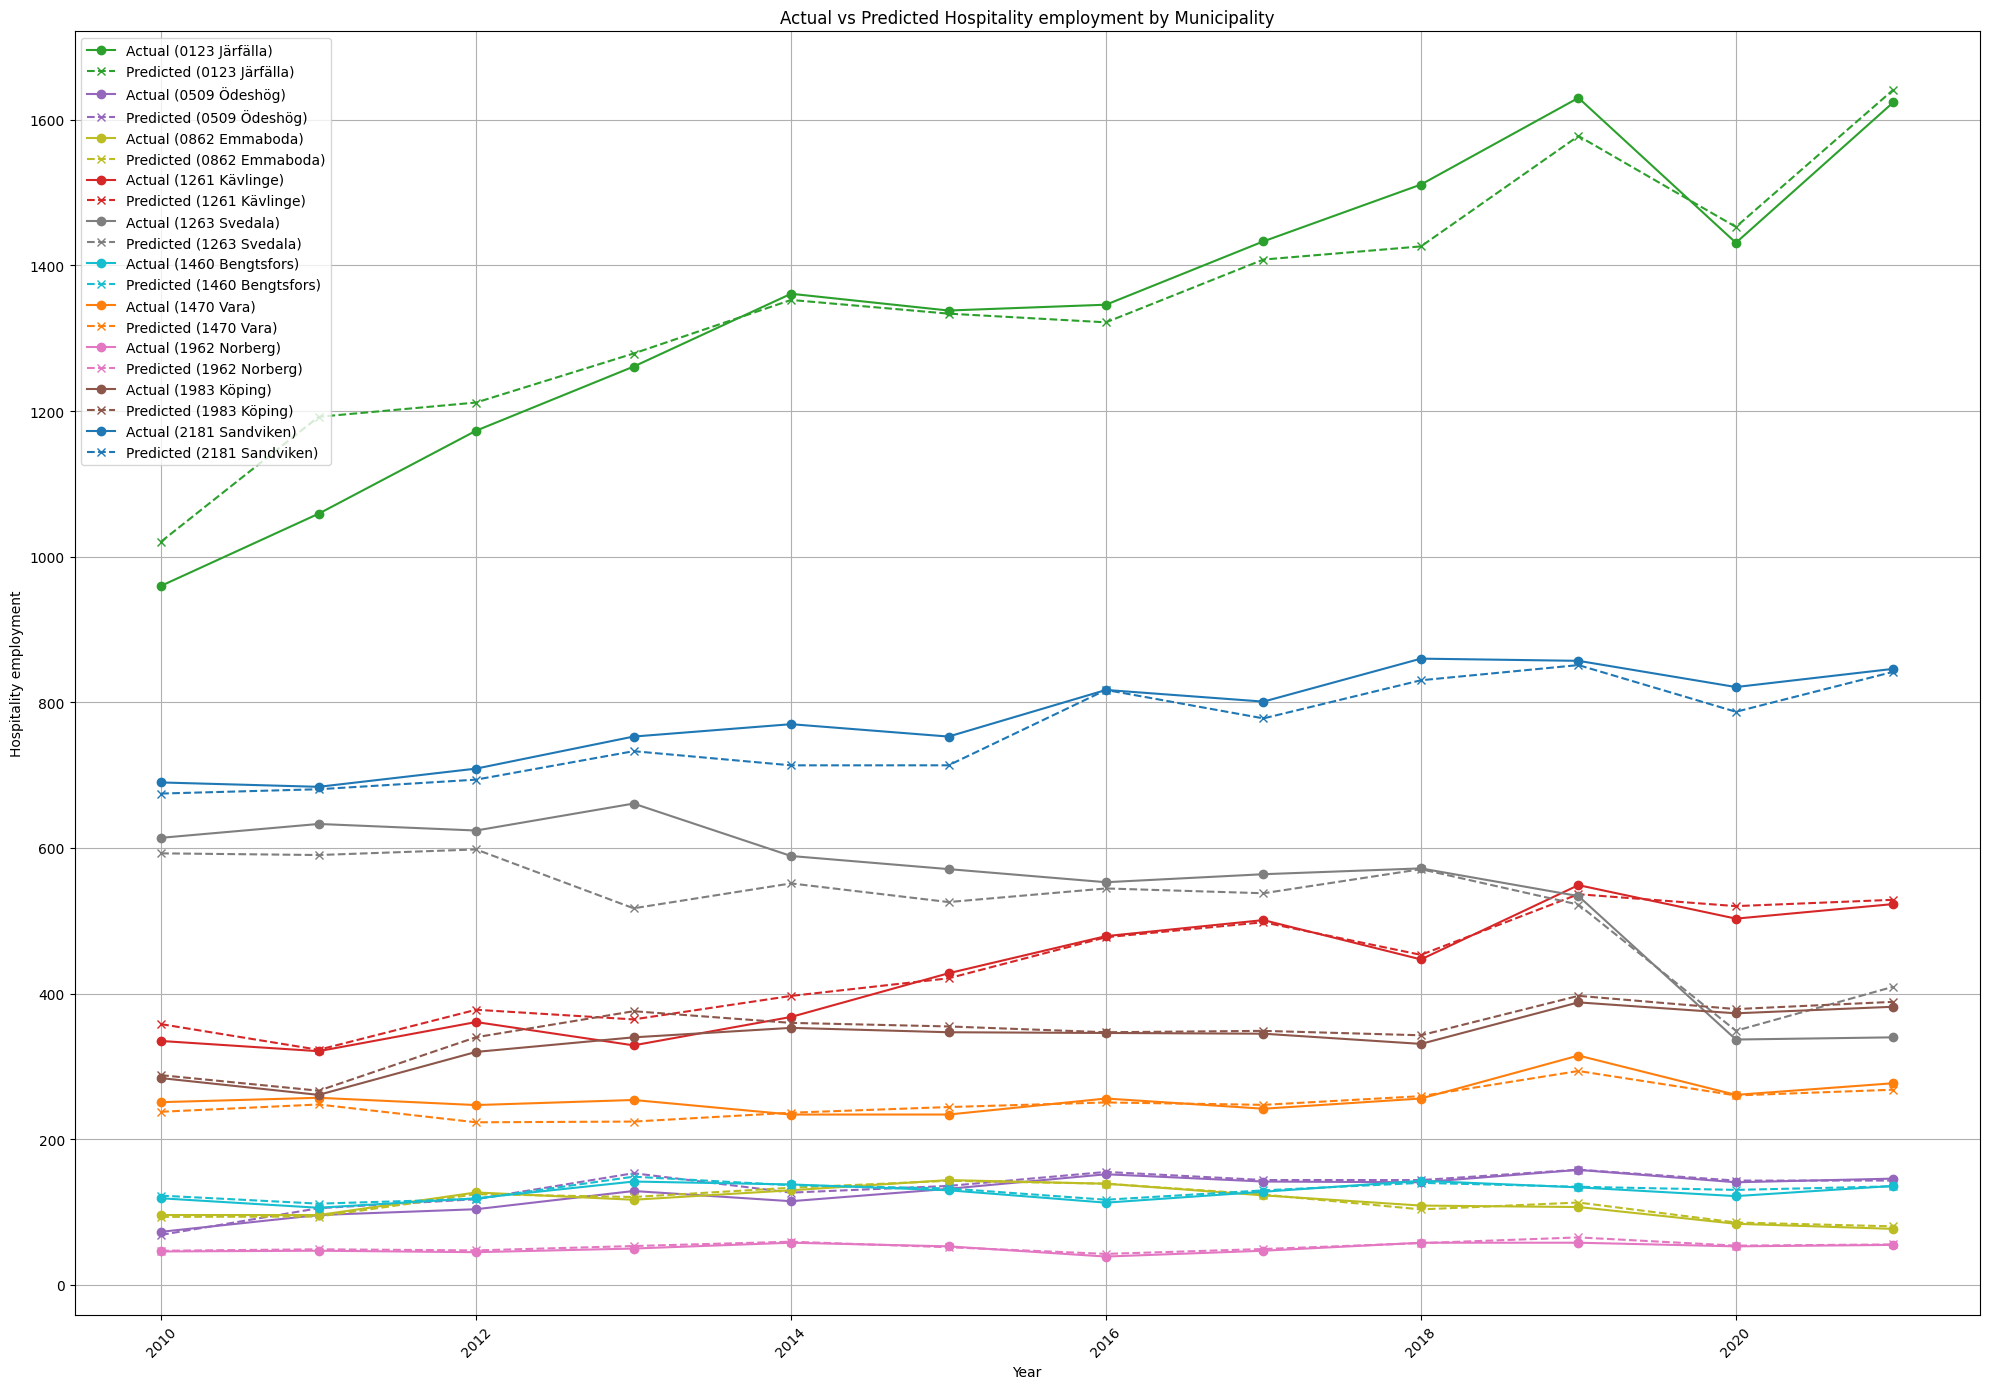

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Randomly select 10 municipalities
random_municipalities = np.random.choice(all_rf_pred_df['Municipality'].unique(), size=10, replace=False)

# Generate a set of distinct colors for each municipality
colors = plt.cm.tab10(np.linspace(0, 1, len(random_municipalities)))

# Create a dictionary to store the mapping between municipality and color
color_dict = dict(zip(random_municipalities, colors))

# Filter the DataFrame to include only the selected municipalities
filtered_df = all_rf_pred_df[all_rf_pred_df['Municipality'].isin(random_municipalities)]

grouped_df = filtered_df.groupby('Municipality')

plt.figure(figsize=(20, 14))

for province, data in grouped_df:
    color = color_dict[province]  # Get the color for the current municipality
    plt.plot(data['Year'], data['Actual hospitality employment'], label=f'Actual ({province})', color=color, marker='o')
    plt.plot(data['Year'], data['Predicted hospitality employment'], label=f'Predicted ({province})', linestyle='--', color=color, marker='x')

plt.xlabel('Year')
plt.ylabel('Hospitality employment')
plt.title('Actual vs Predicted Hospitality employment by Municipality')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


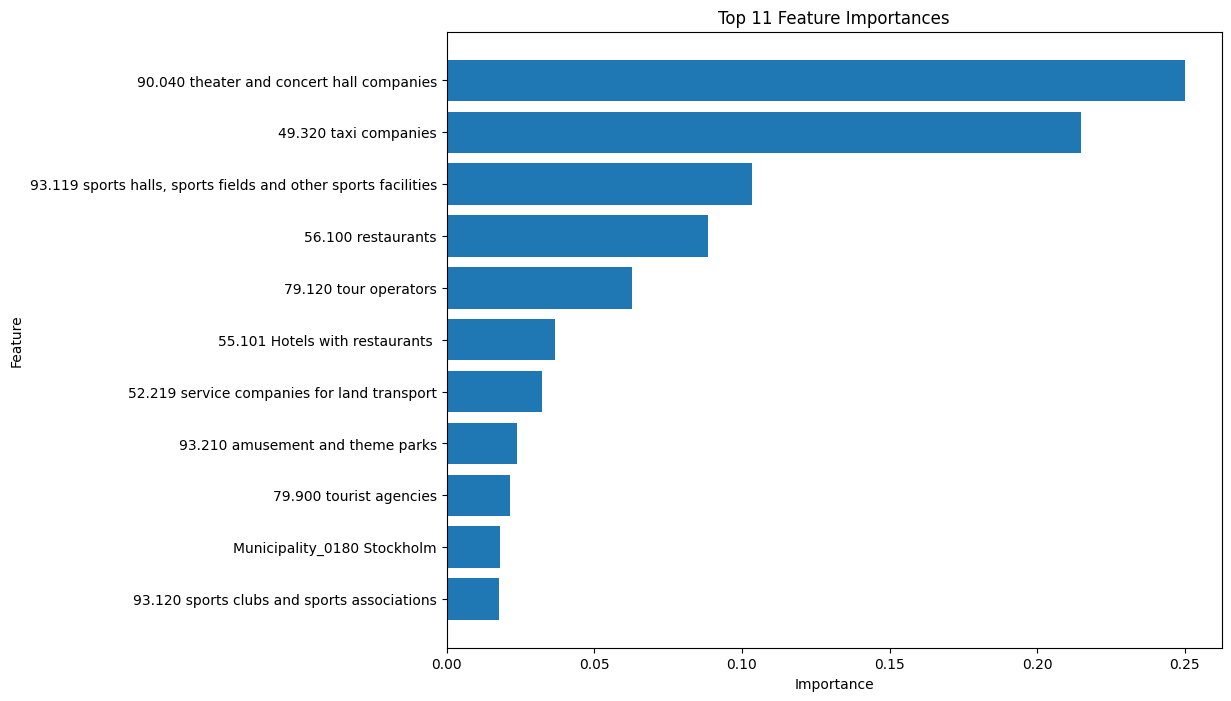

In [ ]:
# Specify the feature names explicitly
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(categories='auto', handle_unknown='ignore'), ['Municipality'])
    ],
    remainder='passthrough'
)

# Fit and transform on X_train
X_train_encoded = column_transformer.fit_transform(X_train)

# Transform on X_test
X_test_encoded = column_transformer.transform(X_test)

# Get column names after one-hot encoding
encoded_columns = column_transformer.named_transformers_['onehot'].get_feature_names_out(input_features=['Municipality'])

# Combine encoded columns with remaining columns
new_columns = list(encoded_columns) + X_train.columns.drop('Municipality').tolist()

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': new_columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:11], feature_importance_df['Importance'][:11], align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 11 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


In [ ]:
feature_importance_df[:11]

Feature  Importance
319          90.040 theater and concert hall companies    0.249908
293                              49.320 taxi companies    0.214918
325  93.119 sports halls, sports fields and other s...    0.103531
304                                 56.100 restaurants    0.088578
316                              79.120 tour operators    0.062772
297                    55.101 Hotels with restaurants     0.036794
296        52.219 service companies for land transport    0.032430
330                   93.210 amusement and theme parks    0.023821
317                            79.900 tourist agencies    0.021657
16                         Municipality_0180 Stockholm    0.017964
326        93.120 sports clubs and sports associations    0.017881

In [ ]:
import pandas as pd
import statsmodels.api as sm


# Define the independent variables
independent_vars = ['90.040 theater and concert hall companies', '49.320 taxi companies',
       '79.120 tour operators', '56.100 restaurants',
       '55.101 Hotels with restaurants ', '52.219 service companies for land transport', '93.210 amusement and theme parks',
       '79.900 tourist agencies', '93.120 sports clubs and sports associations',]

df['const'] = 1

df['Total hospitality employment'] = pd.to_numeric(df['Total hospitality employment'])

fixed_effects = df['Municipality']


dependent_var = df['Total hospitality employment']

model = sm.OLS(dependent_var, df[independent_vars + ['const']])

fixed_effects_results = model.fit()

print(fixed_effects_results.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Total hospitality employment   R-squared:                       0.988
Model:                                      OLS   Adj. R-squared:                  0.988
Method:                           Least Squares   F-statistic:                 3.138e+04
Date:                          Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                                  00:39:54   Log-Likelihood:                -25669.
No. Observations:                          3504   AIC:                         5.136e+04
Df Residuals:                              3494   BIC:                         5.142e+04
Df Model:                                     9                                         
Covariance Type:                      nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975

In [ ]:
import pandas as pd
import statsmodels.api as sm


# Define the independent variables
independent_vars = ['49.320 taxi companies', '51.101 airline ',
       '51.102 charter and taxi airlines',
       '52.219 service companies for land transport',
       '55.101 Hotels with restaurants ', '55.102 konference facilities',
       '55.103 hotels without restaurants', '55.201 Hotels etc.',
       '55.202 cottage villages etc.', '55.300 campsites etc.',
       '55.900 other accomodations', '56.100 restaurants',
       '56.210 catering companies for individual events',
       '56.291 staff canteens', '56.292 central kitchen for hospitals',
       '56.293 central kitchens for school, care and other insitutions',
       '56.294 catering companies for transport sector ',
       '56.299 other catering companies', '56.300 bars and pubs',
       '77.110 car rental companies',
       '77.210 lessors of leisure and sports equipment',
       '77.220 videocassette and DVD rental companies',
       '79.110 travel agencies', '79.120 tour operators',
       '79.900 tourist agencies',
       '90.020 support companies for artistic companies',
       '90.040 theater and concert hall companies',
       '91.040 botancal gardens, ZOOS and nature reserves',
       '93.111 Skiing resorts', '93.112 golf courses, golf clubs',
       '93.113 Motorways', '93.114 trotting and galloping tracks',
       '93.119 sports halls, sports fields and other sports facilities',
       '93.120 sports clubs and sports associations', '93.130 gym facilities',
       '93.191 competition stalls',
       '93.199 professional athletes, sport organizers, sport administrators',
       '93.210 amusement and theme parks',
       '93.290 other leisure and entertainment facilities']

df['const'] = 1

df['Total hospitality employment'] = pd.to_numeric(df['Total hospitality employment'])

fixed_effects = df['Municipality']


dependent_var = df['Total hospitality employment']

model = sm.OLS(dependent_var, df[independent_vars + ['const']])

fixed_effects_results = model.fit()

print(fixed_effects_results.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Total hospitality employment   R-squared:                       1.000
Model:                                      OLS   Adj. R-squared:                  1.000
Method:                           Least Squares   F-statistic:                 1.042e+31
Date:                          Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                                  00:51:00   Log-Likelihood:                 83884.
No. Observations:                          3504   AIC:                        -1.677e+05
Df Residuals:                              3464   BIC:                        -1.674e+05
Df Model:                                    39                                         
Covariance Type:                      nonrobust                                         
                                                                           coef    std err          t      P>|

In [ ]:
import pandas as pd
from linearmodels.panel import RandomEffects


# Define the independent variables
independent_vars = ['90.040 theater and concert hall companies', '49.320 taxi companies',
       '79.120 tour operators', '56.100 restaurants',
       '55.101 Hotels with restaurants ', '52.219 service companies for land transport', '93.210 amusement and theme parks',
       '79.900 tourist agencies', '93.120 sports clubs and sports associations',]

df.set_index(['Municipality', 'Year'], inplace=True)

df['const'] = 1

df['Total hospitality employment'] = pd.to_numeric(df['Total hospitality employment'])


dependent_var = df['Total hospitality employment']

# Define the model (Random Effects)
model = RandomEffects(dependent_var, df[independent_vars + ['const']])

# Fit the model
random_effects_results = model.fit()

print(random_effects_results)

                             RandomEffects Estimation Summary                             
Dep. Variable:     Total hospitality employment   R-squared:                        0.9752
Estimator:                        RandomEffects   R-squared (Between):              0.9886
No. Observations:                          3504   R-squared (Within):               0.6097
Date:                          Tue, Apr 23 2024   R-squared (Overall):              0.9862
Time:                                  00:42:09   Log-likelihood                -2.388e+04
Cov. Estimator:                      Unadjusted                                           
                                                  F-statistic:                   1.524e+04
Entities:                                   292   P-value                           0.0000
Avg Obs:                                 12.000   Distribution:                  F(9,3494)
Min Obs:                                 12.000                                           

In [ ]:
import pandas as pd
from linearmodels.panel import RandomEffects


# Define the independent variables
independent_vars = ['49.320 taxi companies', '51.101 airline ',
       '51.102 charter and taxi airlines',
       '52.219 service companies for land transport',
       '55.101 Hotels with restaurants ', '55.102 konference facilities',
       '55.103 hotels without restaurants', '55.201 Hotels etc.',
       '55.202 cottage villages etc.', '55.300 campsites etc.',
       '55.900 other accomodations', '56.100 restaurants',
       '56.210 catering companies for individual events',
       '56.291 staff canteens', '56.292 central kitchen for hospitals',
       '56.293 central kitchens for school, care and other insitutions',
       '56.294 catering companies for transport sector ',
       '56.299 other catering companies', '56.300 bars and pubs',
       '77.110 car rental companies',
       '77.210 lessors of leisure and sports equipment',
       '77.220 videocassette and DVD rental companies',
       '79.110 travel agencies', '79.120 tour operators',
       '79.900 tourist agencies',
       '90.020 support companies for artistic companies',
       '90.040 theater and concert hall companies',
       '91.040 botancal gardens, ZOOS and nature reserves',
       '93.111 Skiing resorts', '93.112 golf courses, golf clubs',
       '93.113 Motorways', '93.114 trotting and galloping tracks',
       '93.119 sports halls, sports fields and other sports facilities',
       '93.120 sports clubs and sports associations', '93.130 gym facilities',
       '93.191 competition stalls',
       '93.199 professional athletes, sport organizers, sport administrators',
       '93.210 amusement and theme parks',
       '93.290 other leisure and entertainment facilities']

# df.set_index(['Municipality', 'Year'], inplace=True)

df['const'] = 1

df['Total hospitality employment'] = pd.to_numeric(df['Total hospitality employment'])


dependent_var = df['Total hospitality employment']

# Define the model (Random Effects)
model = RandomEffects(dependent_var, df[independent_vars + ['const']])

# Fit the model
random_effects_results = model.fit()

print(random_effects_results)

                             RandomEffects Estimation Summary                             
Dep. Variable:     Total hospitality employment   R-squared:                        1.0000
Estimator:                        RandomEffects   R-squared (Between):              1.0000
No. Observations:                          3504   R-squared (Within):               1.0000
Date:                          Tue, Apr 23 2024   R-squared (Overall):              1.0000
Time:                                  00:49:39   Log-likelihood                 9.502e+04
Cov. Estimator:                      Unadjusted                                           
                                                  F-statistic:                   3.384e+32
Entities:                                   292   P-value                           0.0000
Avg Obs:                                 12.000   Distribution:                 F(39,3464)
Min Obs:                                 12.000                                           